<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Redes-neuronales-convolucionales" data-toc-modified-id="Redes-neuronales-convolucionales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Redes neuronales convolucionales</a></span><ul class="toc-item"><li><span><a href="#Introducción-a-las-CNNs" data-toc-modified-id="Introducción-a-las-CNNs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introducción a las CNNs</a></span><ul class="toc-item"><li><span><a href="#Convolución" data-toc-modified-id="Convolución-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Convolución</a></span></li></ul></li><li><span><a href="#Ejemplo-de-CNNs-en-Keras" data-toc-modified-id="Ejemplo-de-CNNs-en-Keras-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ejemplo de CNNs en Keras</a></span></li><li><span><a href="#Regularización" data-toc-modified-id="Regularización-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Regularización</a></span><ul class="toc-item"><li><span><a href="#L1-y-L2" data-toc-modified-id="L1-y-L2-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>L1 y L2</a></span></li><li><span><a href="#Dropout" data-toc-modified-id="Dropout-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Dropout</a></span></li></ul></li></ul></li></ul></div>

# Redes neuronales convolucionales

## Introducción a las CNNs

### Convolución

In [1]:
X = np.array([[1,1,1,0,0], [0,1,1,1,0], [0,0,1,1,1], [0,0,1,1,0], [0,1,1,0,0]])
K = np.array([[1,0,1],[0,1,0],[1,0,1]])

In [2]:
X

array([[1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0]])

In [3]:
K

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [4]:
from scipy.signal import convolve2d

In [6]:
convolve2d(X,K, mode='valid')

array([[4, 3, 4],
       [2, 4, 3],
       [2, 3, 4]])

## Ejemplo de CNNs en Keras

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import fashion_mnist
(X_ent, y_ent), (X_pru, y_pru) = fashion_mnist.load_data()

Using TensorFlow backend.


In [8]:
# reshape
X_ent = X_ent.reshape((60000, 28, 28, 1))
X_pru = X_pru.reshape((10000, 28, 28, 1))
X_ent = X_ent.astype('float32')
X_pru = X_pru.astype('float32')
# normalizamos
X_ent, X_pru = X_ent / 255.0, X_pru / 255.0
y_ent = tf.keras.utils.to_categorical(y_ent, 10)
y_pru = tf.keras.utils.to_categorical(y_pru, 10)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [25]:
# motramos la arq de la red
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [26]:
# compilamos el modelo
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [27]:
history = model.fit(X_ent, y_ent, batch_size=64, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 40s 47ms/step - loss: 0.5489 - accuracy: 0.8040 - val_loss: 0.4134 - val_accuracy: 0.8485
Epoch 2/10
844/844 [==============================] - 38s 45ms/step - loss: 0.3680 - accuracy: 0.8690 - val_loss: 0.3385 - val_accuracy: 0.8788
Epoch 3/10
844/844 [==============================] - 38s 45ms/step - loss: 0.3284 - accuracy: 0.8831 - val_loss: 0.3342 - val_accuracy: 0.8778
Epoch 4/10
844/844 [==============================] - 38s 45ms/step - loss: 0.2975 - accuracy: 0.8927 - val_loss: 0.3027 - val_accuracy: 0.8930
Epoch 5/10
844/844 [==============================] - 38s 45ms/step - loss: 0.2791 - accuracy: 0.8988 - val_loss: 0.3130 - val_accuracy: 0.8800
Epoch 6/10
844/844 [==============================] - 38s 45ms/step - loss: 0.2606 - accuracy: 0.9054 - val_loss: 0.2861 - val_accuracy: 0.8963
Epoch 7/10
844/844 [==============================] - 37s 44ms/step - loss: 0.2447 - accuracy: 0.9105 - val_loss: 0.2713 - val_accuracy:

In [28]:
puntuaciones = model.evaluate(X_pru, y_pru, verbose=1)
print("\nPerdida: {:.2f}".format(puntuaciones[0]))
print("Exactitud: {:.2f}".format(puntuaciones[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.2817 - accuracy: 0.8987

Perdida: 0.28
Exactitud: 0.90


In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


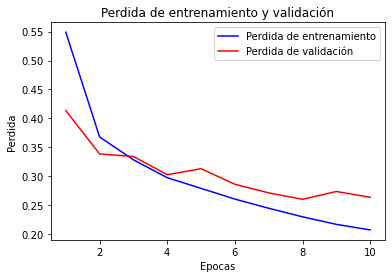

In [29]:
# graficando la perdida de entrenamiento y validación
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'b', label='Perdida de entrenamiento')
plt.plot(epochs, val_loss_values, 'r', label='Perdida de validación')
plt.title('Perdida de entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

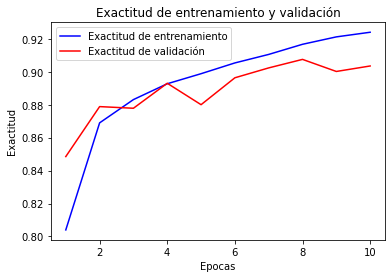

In [30]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'b', label='Exactitud de entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Exactitud de validación')
plt.title('Exactitud de entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

## Regularización

### L1 y L2

In [49]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [50]:
# motramos la arq de la red
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [51]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
history = model.fit(X_ent, y_ent, batch_size=64, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 36s 42ms/step - loss: 0.6194 - accuracy: 0.7934 - val_loss: 0.4697 - val_accuracy: 0.8475
Epoch 2/10
844/844 [==============================] - 37s 43ms/step - loss: 0.4372 - accuracy: 0.8589 - val_loss: 0.4349 - val_accuracy: 0.8565
Epoch 3/10
844/844 [==============================] - 36s 43ms/step - loss: 0.3955 - accuracy: 0.8739 - val_loss: 0.3881 - val_accuracy: 0.8760
Epoch 4/10
844/844 [==============================] - 37s 43ms/step - loss: 0.3727 - accuracy: 0.8812 - val_loss: 0.3694 - val_accuracy: 0.8832
Epoch 5/10
844/844 [==============================] - 37s 44ms/step - loss: 0.3579 - accuracy: 0.8853 - val_loss: 0.3547 - val_accuracy: 0.8848
Epoch 6/10
844/844 [==============================] - 36s 42ms/step - loss: 0.3451 - accuracy: 0.8915 - val_loss: 0.3570 - val_accuracy: 0.8827
Epoch 7/10
844/844 [==============================] - 35s 42ms/step - loss: 0.3347 - accuracy: 0.8948 - val_loss: 0.3517 - val_accuracy:

In [52]:
puntuaciones = model.evaluate(X_pru, y_pru, verbose=1)
print("\nPerdida: {:.2f}".format(puntuaciones[0]))
print("Exactitud: {:.2f}".format(puntuaciones[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.3531 - accuracy: 0.8862

Perdida: 0.35
Exactitud: 0.89


###    Dropout
    

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [54]:
# motramos la arq de la red
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 64)        

In [55]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
history = model.fit(X_ent, y_ent, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 56s 133ms/step - loss: 0.5620 - accuracy: 0.8057 - val_loss: 0.7128 - val_accuracy: 0.7742
Epoch 2/10
422/422 [==============================] - 55s 131ms/step - loss: 0.3794 - accuracy: 0.8657 - val_loss: 0.3000 - val_accuracy: 0.8910
Epoch 3/10
422/422 [==============================] - 55s 130ms/step - loss: 0.3351 - accuracy: 0.8803 - val_loss: 0.3013 - val_accuracy: 0.8893
Epoch 4/10
422/422 [==============================] - 56s 133ms/step - loss: 0.3109 - accuracy: 0.8888 - val_loss: 0.2904 - val_accuracy: 0.8927
Epoch 5/10
422/422 [==============================] - 57s 134ms/step - loss: 0.2927 - accuracy: 0.8942 - val_loss: 0.2777 - val_accuracy: 0.8983
Epoch 6/10
422/422 [==============================] - 56s 132ms/step - loss: 0.2790 - accuracy: 0.8991 - val_loss: 0.2794 - val_accuracy: 0.9015
Epoch 7/10
422/422 [==============================] - 56s 133ms/step - loss: 0.2695 - accuracy: 0.9024 - val_loss: 0.2724 - val_ac

In [56]:
puntuaciones = model.evaluate(X_pru, y_pru, verbose=1)
print("\nPerdida: {:.2f}".format(puntuaciones[0]))
print("Exactitud: {:.2f}".format(puntuaciones[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.2928 - accuracy: 0.8938

Perdida: 0.29
Exactitud: 0.89


In [60]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', 
    input_shape=X_ent.shape[1:], activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
 
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))
 
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary() 

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)      

In [62]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
history = model.fit(X_ent, y_ent, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 302s 716ms/step - loss: 0.2044 - accuracy: 0.9256 - val_loss: 0.2131 - val_accuracy: 0.9197
Epoch 2/10
422/422 [==============================] - 306s 724ms/step - loss: 0.1895 - accuracy: 0.9306 - val_loss: 0.2138 - val_accuracy: 0.9215
Epoch 3/10
422/422 [==============================] - 300s 712ms/step - loss: 0.1780 - accuracy: 0.9353 - val_loss: 0.1791 - val_accuracy: 0.9345
Epoch 4/10
422/422 [==============================] - 288s 683ms/step - loss: 0.1674 - accuracy: 0.9386 - val_loss: 0.1825 - val_accuracy: 0.9335
Epoch 5/10
422/422 [==============================] - 274s 649ms/step - loss: 0.1594 - accuracy: 0.9424 - val_loss: 0.1799 - val_accuracy: 0.9375
Epoch 6/10
422/422 [==============================] - 275s 651ms/step - loss: 0.1532 - accuracy: 0.9440 - val_loss: 0.1848 - val_accuracy: 0.9345
Epoch 7/10
422/422 [==============================] - 275s 652ms/step - loss: 0.1477 - accuracy: 0.9456 - val_loss: 0.1857 -

In [63]:
puntuaciones = model.evaluate(X_pru, y_pru, verbose=1)
print("\nPerdida: {:.2f}".format(puntuaciones[0]))
print("Exactitud: {:.2f}".format(puntuaciones[1]))

313/313 [==============================] - 11s 34ms/step - loss: 0.2102 - accuracy: 0.9286

Perdida: 0.21
Exactitud: 0.93
